In [1]:
import healpy as hp
import pylab as mplot
%pylab inline
import astropy.io.fits as pf
import astropy.io.fits as fits
import numpy as np
import scipy 
import kmeans_radec
%matplotlib inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Redmapper Mask – From Random

In [2]:



# Read in Redmapper Random data
hdul = fits.open('/Users/arielamsellem/Desktop/Research/splashback_codes/Fits_files/RM_cluster_rand.fits')
data = hdul[1].data
cols = hdul[1].columns
print(cols.names)
ra = data.field('RA')
dec = data.field('DEC')

# Convert to radians
ra_rad = ra * np.pi * (1./180.)
dec_rad = dec * np.pi * (1./180.)

# Convert dec to 
phi = np.pi/2 - dec_rad
theta = ra_rad

['RA', 'DEC', 'Z', 'LAMBDA', 'W', 'JK']


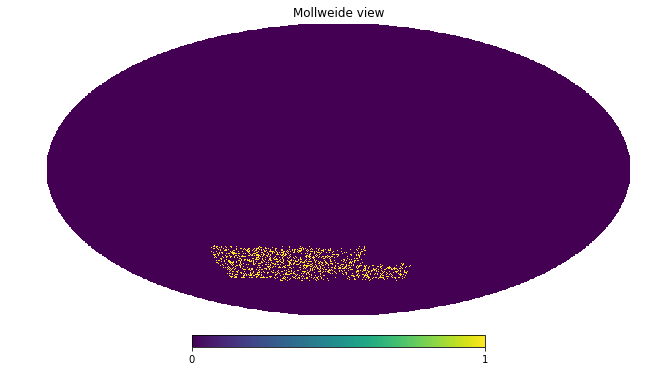

In [3]:
# Convert to pixels and plot where there is at least one cluster
pix_r_ran = hp.ang2pix(4096, phi, theta)
mask_rm_ran = np.zeros(hp.nside2npix(4096))
mask_rm_ran[pix_r_ran] = 1
hp.mollview(mask_rm_ran)

## Redmapper Mask – Directly From Mask

ColDefs(
    name = 'HPIX'; format = 'K'
    name = 'FRACGOOD'; format = 'E'
    name = 'ZMAX'; format = 'E'
    name = 'MASKFRAC_EST'; format = 'E'
)


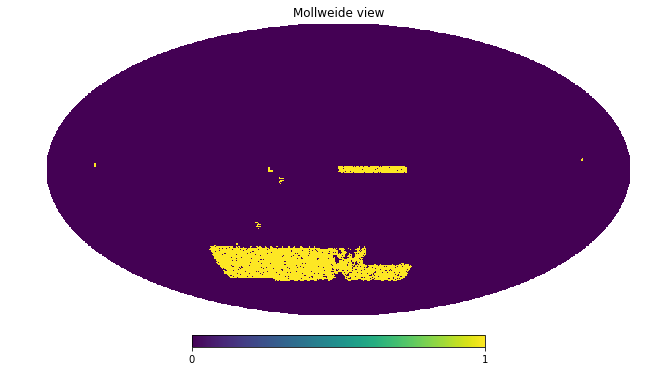

In [4]:
mask_pix_r_mas = fits.open('./Fits_files/RM_mask.fits')
cols_r = mask_pix_r_mas[1].columns
print(cols_r)
pix_r_mas = mask_pix_r_mas[1].data['HPIX']

mask_rm_mas = np.zeros(hp.nside2npix(4096))
mask_rm_mas[pix_r_mas] = 1
fig = hp.mollview(mask_rm_mas)

## WaZP Mask

In [5]:
mask_pix_w = pf.open('./Fits_files/WaZP_mask.fits')
cols_w = mask_pix_w[1].columns
pix_w = mask_pix_w[1].data['pixel']
#print(cols_mask_w.names)
#print(mask_w[1].data['pixel'])
# figuring out what's the maximum number in the index, in order to figure out the nside
#mplot.plot(mask_w[1].data)
# try nside=4096
#hp.nside2npix(4096)
# now populate the mask, define a zero array with the length of a nside 4096 map
mask_w = np.zeros(hp.nside2npix(4096))


# set the footprint pixel ids to 1
mask_w[pix_w] = 1

193537048
7789544
199478892
1847700
193289434
8037158


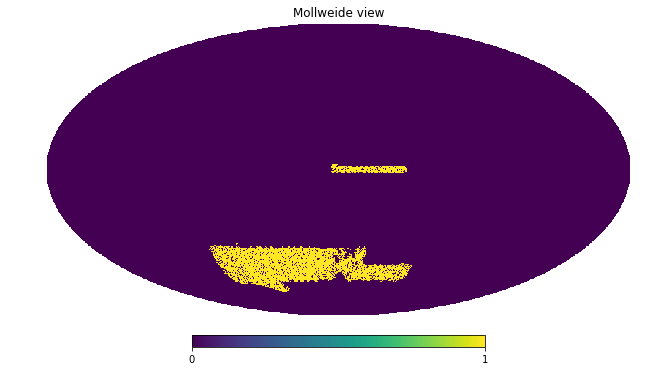

In [6]:
# show the mask
hp.mollview(mask_w)


# WaZP Information
print(len(mask_w) - len(np.where(mask_w == 1)[0]))
print(len(np.where(mask_w == 1)[0]))

# RM Random Information
print(len(mask_rm_ran) - len(np.where(mask_rm_ran == 1)[0]))
print(len(np.where(mask_rm_ran == 1)[0]))

# RM Mask Information
print(len(mask_rm_mas) - len(np.where(mask_rm_mas == 1)[0]))
print(len(np.where(mask_rm_mas == 1)[0]))

## Comparison of Masks

In [7]:
# How many hits in RM Mask are not in WaZP
compare_1 = np.isin(pix_w, pix_r_mas)
# How many hits in WaZP are not in RM Mask
compare_2 = np.isin(pix_r_mas, pix_w)
# How many hits in RM Random are not in RM Mask
compare_3 = np.isin(pix_r_ran, pix_r_mas)
# How many hits in RM Mask are not in RM Random
compare_4 = np.isin(pix_r_mas, pix_r_ran)

In [8]:
diff_1 = np.where(compare_1 == False)[0]
print(len(diff_1))

diff_2 = np.where(compare_2 == False)[0]
print(len(diff_2))

diff_3 = np.where(compare_3 == False)[0]
print(len(diff_3))

diff_4 = np.where(compare_4 == False)[0]
print(len(diff_4))


print(len(pix_r_mas), len(pix_w))
print('Percentage Difference Between RM Mask and WazP: ' + str(100*(len(diff_1)+len(diff_2))/len(pix_r_mas)) + '%')
print('Percentage Difference Between RM Mask and RM Random: ' + str(100*(len(diff_3)+len(diff_4))/len(pix_r_mas)) + '%')

610137
857751
2
6189460
8037158 7789544
Percentage Difference Between RM Mask and WazP: 18.263769357277784%
Percentage Difference Between RM Mask and RM Random: 77.01058010804317%


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


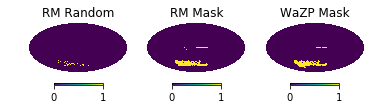

<Figure size 7200x7200 with 0 Axes>

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
plt.figure(figsize = (100, 100))
plt.axes(ax1)
hp.mollview(mask_rm_ran, title = 'RM Random', hold = True)

plt.axes(ax2)
hp.mollview(mask_rm_mas, title = 'RM Mask', hold = True)

plt.axes(ax3)
hp.mollview(mask_w, title = 'WaZP Mask', hold = True)
#plt.savefig('./Mask_Comparison.png', dpi = 900)